<a href="https://colab.research.google.com/github/vivaming/PyPractice/blob/master/DLWithPython_CH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from keras.datasets import imdb

In [75]:
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

In [76]:
max([max(indices) for indices in train_data])

9999

In [77]:
word_index=imdb.get_word_index()

In [78]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [79]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [80]:
import numpy as np

In [81]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

vectorise the training and testing data sets

In [82]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [83]:
x_train.shape, x_test.shape, len(x_train.sum(axis=1)), len(train_data[0]), x_train[0].sum()

((25000, 10000), (25000, 10000), 25000, 218, 120.0)

vectorise the labels

In [84]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [85]:
from keras import models
from keras import layers

In [86]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [87]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Set aside some data for validation step

In [88]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

Fit the model

In [89]:
history=model.fit(partial_x_train, 
                  partial_y_train, 
                  epochs=20,
                  batch_size=32,
                  validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3494 - accuracy: 0.8527 - val_loss: 0.2870 - val_accuracy: 0.8843
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2028 - accuracy: 0.9217 - val_loss: 0.2980 - val_accuracy: 0.8820
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1558 - accuracy: 0.9407 - val_loss: 0.3201 - val_accuracy: 0.8834
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1265 - accuracy: 0.9535 - val_loss: 0.3558 - val_accuracy: 0.8801
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1058 - accuracy: 0.9621 - val_loss: 0.3900 - val_accuracy: 0.8776
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0827 - accuracy: 0.9707 - val_loss: 0.4311 - val_accuracy: 0.8749
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0666 - accuracy: 0.9771 - val_loss: 0.5007 - val_accuracy: 0.8719
E

In [90]:
history_output=history.history

In [91]:
history_output.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

visualisation


In [92]:
import matplotlib.pyplot as plt

In [93]:
loss_value=history_output['loss']
val_loss_value=history_output['val_loss'] 

In [94]:
epochs=range(1, history.params['epochs']+1)

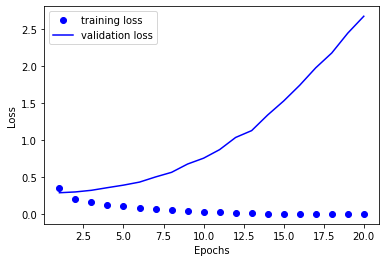

In [95]:
plt.plot(epochs, loss_value, 'bo',  label='training loss')
plt.plot(epochs, val_loss_value, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [104]:
acc_values=history_output['accuracy']
val_acc_values=history_output['val_accuracy']

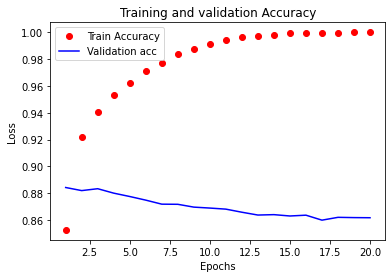

In [105]:
plt.plot(epochs, acc_values, 'ro', label='Train Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
print(history_output.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
